###  Problem Statement:
- **The objective is to create an email spam detection system that uses machine learning algorithms to classify incoming emails. By training the model on labeled dataset of spam and non-spam emails.**

In [1]:
## Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loading the dataset**

In [2]:
df = pd.read_csv('spam.csv',encoding="ISO-8859-1")

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


**Data Cleaning**

In [4]:
### Removing the alst three columns
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.rename({'v1':'category','v2':'message'},axis=1,inplace=True)
df.head()

,category,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
## gives shape of data

df.shape

(5572, 2)

In [8]:
## gives all information of data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  5572 non-null   object
 1   message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df['category'] = pd.get_dummies(df['category'], drop_first=True)

In [10]:
df.head()

,category,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df = df[['message', 'category']]

In [12]:
df.head()

,message,category
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


In [13]:
### Checking for missing values
df.isnull().sum()

message     0
category    0
dtype: int64

- There is  no null values are in dataset

In [14]:
##Check for Duplicates Values

df.duplicated().sum()

403

In [15]:
##Removing  Duplicated values

df = df.drop_duplicates(keep = 'first',ignore_index=True)

In [16]:
### final dataset shape
df.shape

(5169, 2)

### Exploratory Data Analysis(EDA)

In [17]:
df['category'].value_counts(normalize=True)

0    0.87367
1    0.12633
Name: category, dtype: float64

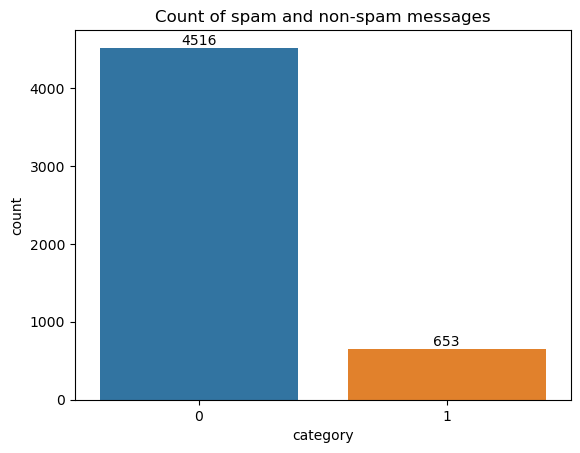

In [18]:
plt.figure.figsize=(4,3)
ax = sns.countplot(df['category'])
plt.title("Count of spam and non-spam messages")
for label in ax.containers:
    ax.bar_label(label);

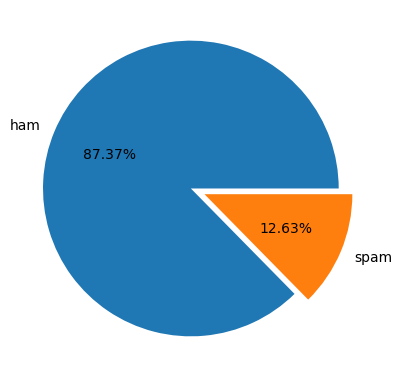

In [19]:
plt.pie(df['category'].value_counts() , labels=['ham', 'spam'], autopct='%0.2f%%', explode=[0.1, 0]);

- About 12% of Emails are Spam.
- There are imbalance in dataset.

In [20]:
#Data cleaning and preprocessing
## importing natural language toolkits
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\munje\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
# Finding Number of characters in message

df['Numof_characters'] = df['message'].apply(len)
df.head()

,message,category,Numof_characters
0,"Go until jurong point, crazy.. Available only ...",0,111
1,Ok lar... Joking wif u oni...,0,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,U dun say so early hor... U c already then say...,0,49
4,"Nah I don't think he goes to usf, he lives aro...",0,61


In [22]:
## average no of chars in messages

print('Average characters in Ham message:', df[df['category']==0]['Numof_characters'].mean())
print('Average characters in Ham message:', df[df['category']==1]['Numof_characters'].mean())

Average characters in Ham message: 70.45925597874225
Average characters in Ham message: 137.89127105666157


In [23]:
# importing word tokenizer and sentence tokenizer for finding no of words and sentences in a message

from nltk.tokenize import sent_tokenize, word_tokenize

In [24]:
## Number of sentences in a message

df['Numof_sentences'] = df['message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [25]:
## Number of words in a message

df['Numof_words'] = df['message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [26]:
df.head()

,message,category,Numof_characters,Numof_sentences,Numof_words
0,"Go until jurong point, crazy.. Available only ...",0,111,2,24
1,Ok lar... Joking wif u oni...,0,29,2,8
2,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,2,37
3,U dun say so early hor... U c already then say...,0,49,1,13
4,"Nah I don't think he goes to usf, he lives aro...",0,61,1,15


In [27]:
## statstical summary of ham message

df[df['category']==0][['Numof_characters','Numof_sentences','Numof_words']].describe()

,Numof_characters,Numof_sentences,Numof_words
count,4516.000000,4516.000000,4516.000000
mean,70.459256,1.799601,17.120903
std,56.358207,1.278465,13.493725
min,2.000000,1.000000,1.000000
25%,34.000000,1.000000,8.000000
50%,52.000000,1.000000,13.000000
75%,90.000000,2.000000,22.000000
max,910.000000,28.000000,220.000000


**Observations:**
- Average no of characters are about 70 with minimum 2 and maximum 910 characters.
- Average no of sentences are about 1.79 with minimum 1 and maximum 28 characters.
- Average no of words are about 17 with minimum 1 and maximum 220 characters.

In [28]:
## statstical summary of spam message

df[df['category']==1][['Numof_characters','Numof_sentences','Numof_words']].describe()

,Numof_characters,Numof_sentences,Numof_words
count,653.000000,653.000000,653.000000
mean,137.891271,2.967841,27.667688
std,30.137753,1.483201,7.008418
min,13.000000,1.000000,2.000000
25%,132.000000,2.000000,25.000000
50%,149.000000,3.000000,29.000000
75%,157.000000,4.000000,32.000000
max,224.000000,8.000000,46.000000


**Observations:**
- Average no of characters are about 137 with minimum 13 and maximum 224 characters.
- Average no of sentences are about 3 with minimum 1 and maximum 8 characters.
- Average no of words are about 27 with minimum 2 and maximum 46 characters.

**Visualization of Number of charaacters in Messages**

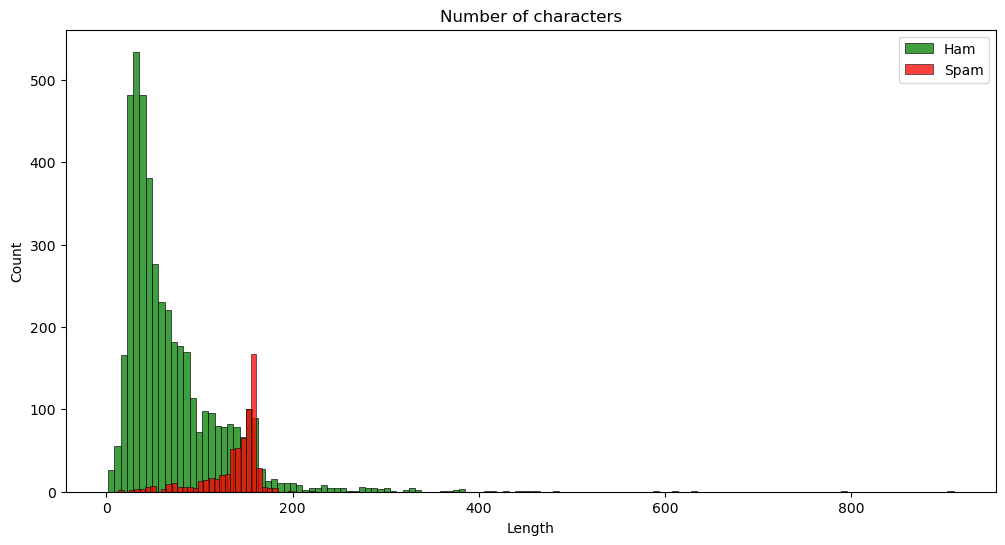

In [29]:
ham = df[df['category']==0]['Numof_characters']
spam = df[df['category']==1]['Numof_characters']

plt.figure(figsize=(12,6))
sns.histplot(ham, color='g', label='Ham')
sns.histplot(spam, color='r' ,label='Spam')
plt.title('Number of characters')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend();

In [30]:
print(df[df['category']==0]['Numof_characters'].skew())
print(df[df['category']==1]['Numof_characters'].skew())

3.496534417134169
-1.7133837509335121


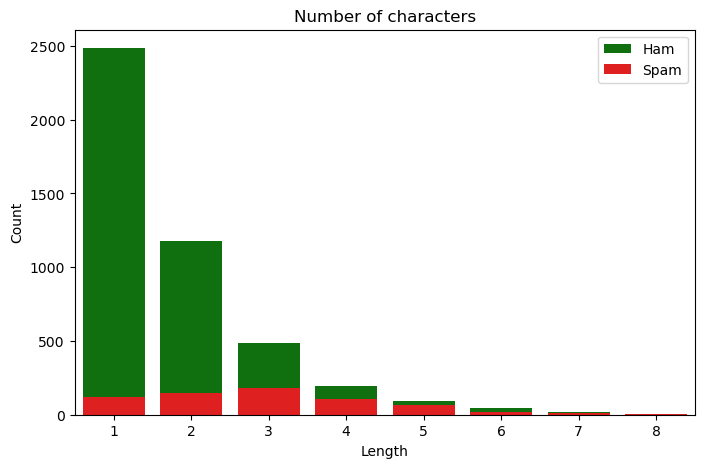

In [31]:
ham = df[df['category']==0]['Numof_sentences']
spam = df[df['category']==1]['Numof_sentences']

plt.figure(figsize=(8,5))
sns.countplot(ham, color='g', label='Ham')
sns.countplot(spam, color='r' ,label='Spam')
plt.title('Number of characters')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend();

**Visualization of Number of words in Messages**

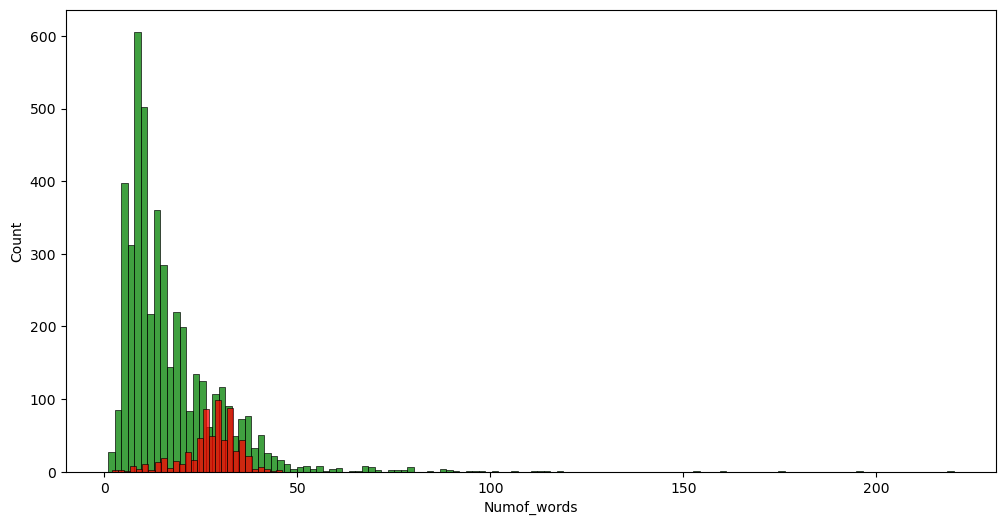

In [32]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['category']==0]['Numof_words'],color='green')
sns.histplot(df[df['category']==1]['Numof_words'],color='red');

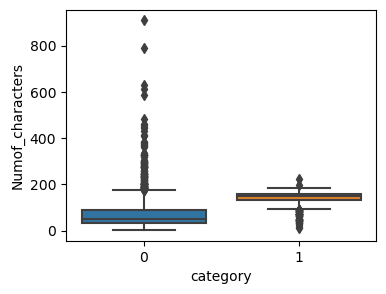

In [33]:
plt.figure(figsize=(4,3))
figure = sns.boxplot(x='category',y='Numof_characters',data=df)

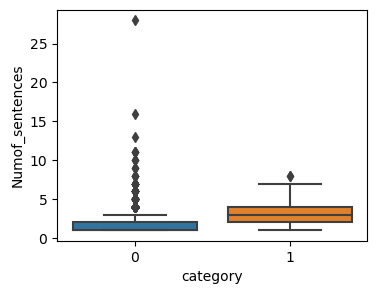

In [34]:
plt.figure(figsize=(4,3))
figure = sns.boxplot(x='category',y='Numof_sentences',data=df)

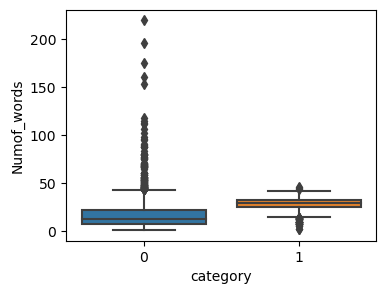

In [35]:
plt.figure(figsize=(4,3))
figure = sns.boxplot(x='category',y='Numof_words',data=df)

<Figure size 400x300 with 0 Axes>

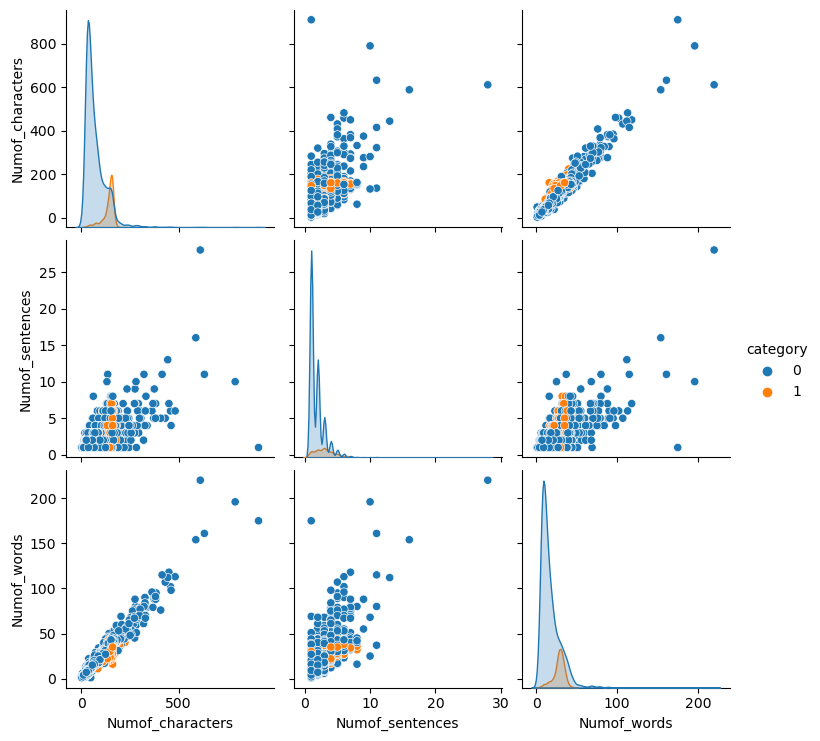

In [36]:
plt.figure(figsize=(4,3))
sns.pairplot(df, hue='category')
plt.show()

### Data Preprocessing
**Text Cleaning**

In [37]:
## Importing natural language tools 
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [38]:
df['message'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [39]:
## Removing stopwords, punchuation,special characters and applying PorterStemming

corpus = []

for i in range(len(df)):
    rp = re.sub('[^a-zA-Z]', " ", df.loc[i, 'message'])
    rp = rp.lower()
    rp = rp.split()
    rp = [ps.stem(word) for word in rp if not word in set(stopwords.words('english'))]
    rp = " ".join(rp)
    corpus.append(rp)

In [40]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

### Modelling using CountVectorizer

In [41]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X1 = cv.fit_transform(corpus).toarray()
y = df['category']

**Train-Test Split**

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1,y, test_size=0.2, random_state=7)

**Modelling and Evaluation**

In [43]:
##Modelling

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

model_cv = MultinomialNB()
model_cv.fit(X_train,y_train)

## Prediction
ypred_test = model_cv.predict(X_test)
ypred_train = model_cv.predict(X_train)

## Evaluation
print('Train Accuracy:', accuracy_score(y_train, ypred_train))
print('Test Accuracy:', accuracy_score(y_test, ypred_test))

Train Accuracy: 0.9915356711003628
Test Accuracy: 0.971953578336557


In [44]:
cf_matrix = confusion_matrix(y_test, ypred_test)
cf_matrix

array([[866,  20],
       [  9, 139]], dtype=int64)

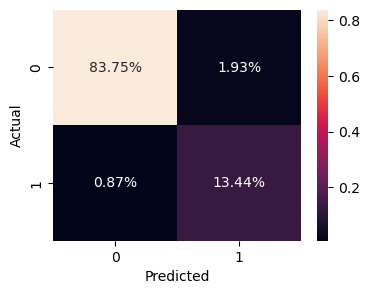

In [45]:
plt.figure(figsize=(4,3))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [46]:
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
print(classification_report(ypred_test,y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       875
           1       0.94      0.87      0.91       159

    accuracy                           0.97      1034
   macro avg       0.96      0.93      0.94      1034
weighted avg       0.97      0.97      0.97      1034



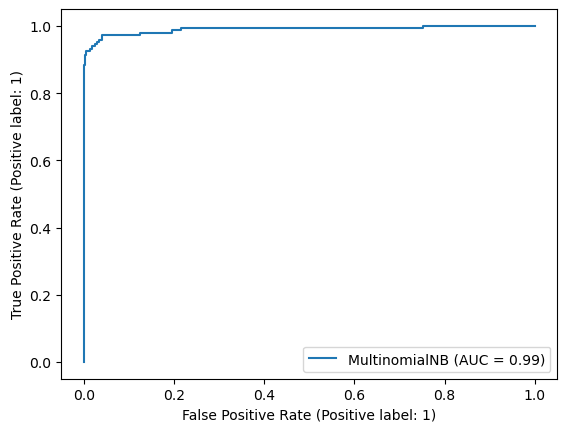

In [47]:
plot_roc_curve(model_cv,X_test,y_test)
plt.show()

### Modelling using TF-IDF

In [48]:
# Creating the TFIDF model

from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=2500)
X2 = tv.fit_transform(corpus).toarray()
y = df['category']

In [49]:
X2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [50]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size = 0.2, random_state = 7)

## Modelling
model_tfidf = MultinomialNB()
model_tfidf.fit(X_train,y_train)

### Prediction
ypred_test = model_tfidf.predict(X_test)
ypred_train = model_tfidf.predict(X_train)

### Evaluation
from sklearn.metrics import accuracy_score
print('Train Accuracy:', accuracy_score(y_train, ypred_train))
print('Test Accuracy:', accuracy_score(y_test, ypred_test))

Train Accuracy: 0.9818621523579202
Test Accuracy: 0.9690522243713733


In [51]:
cf_matrix = confusion_matrix(y_test, ypred_test)
cf_matrix

array([[885,   1],
       [ 31, 117]], dtype=int64)

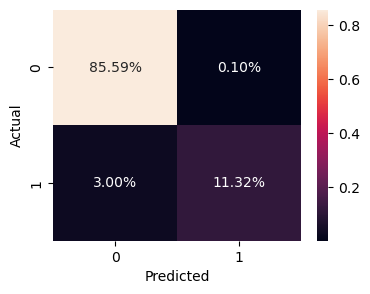

In [52]:
plt.figure(figsize=(4,3))
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [53]:
from sklearn.metrics import classification_report
print(classification_report(ypred_test,y_test))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       916
           1       0.79      0.99      0.88       118

    accuracy                           0.97      1034
   macro avg       0.89      0.98      0.93      1034
weighted avg       0.98      0.97      0.97      1034



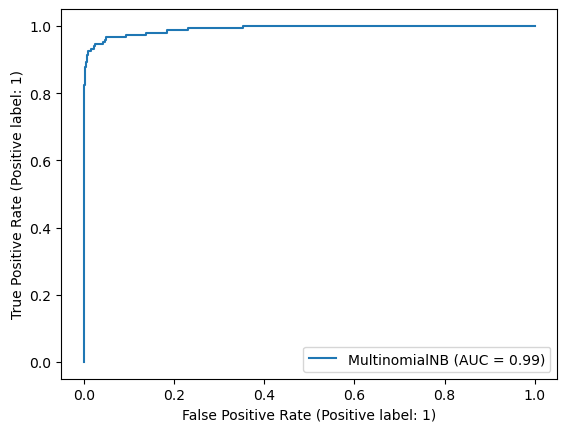

In [54]:
plot_roc_curve(model_tfidf,X_test,y_test)
plt.show()

In [64]:
import pickle
#create a file, where we want to save the model
file = open('churn_x.pkl','wb')

#Dump the inforamtion to the file we created
pickle.dump(model, file)